# KNN & Random forest

In [4]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
df = pd.read_csv("HR_attrition.csv")

Checking for missing values

In [3]:
display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

Dropping some variables

In [5]:
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)

In [6]:
target_map = {'Yes':1, 'No':0}
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

Variables Exploration

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

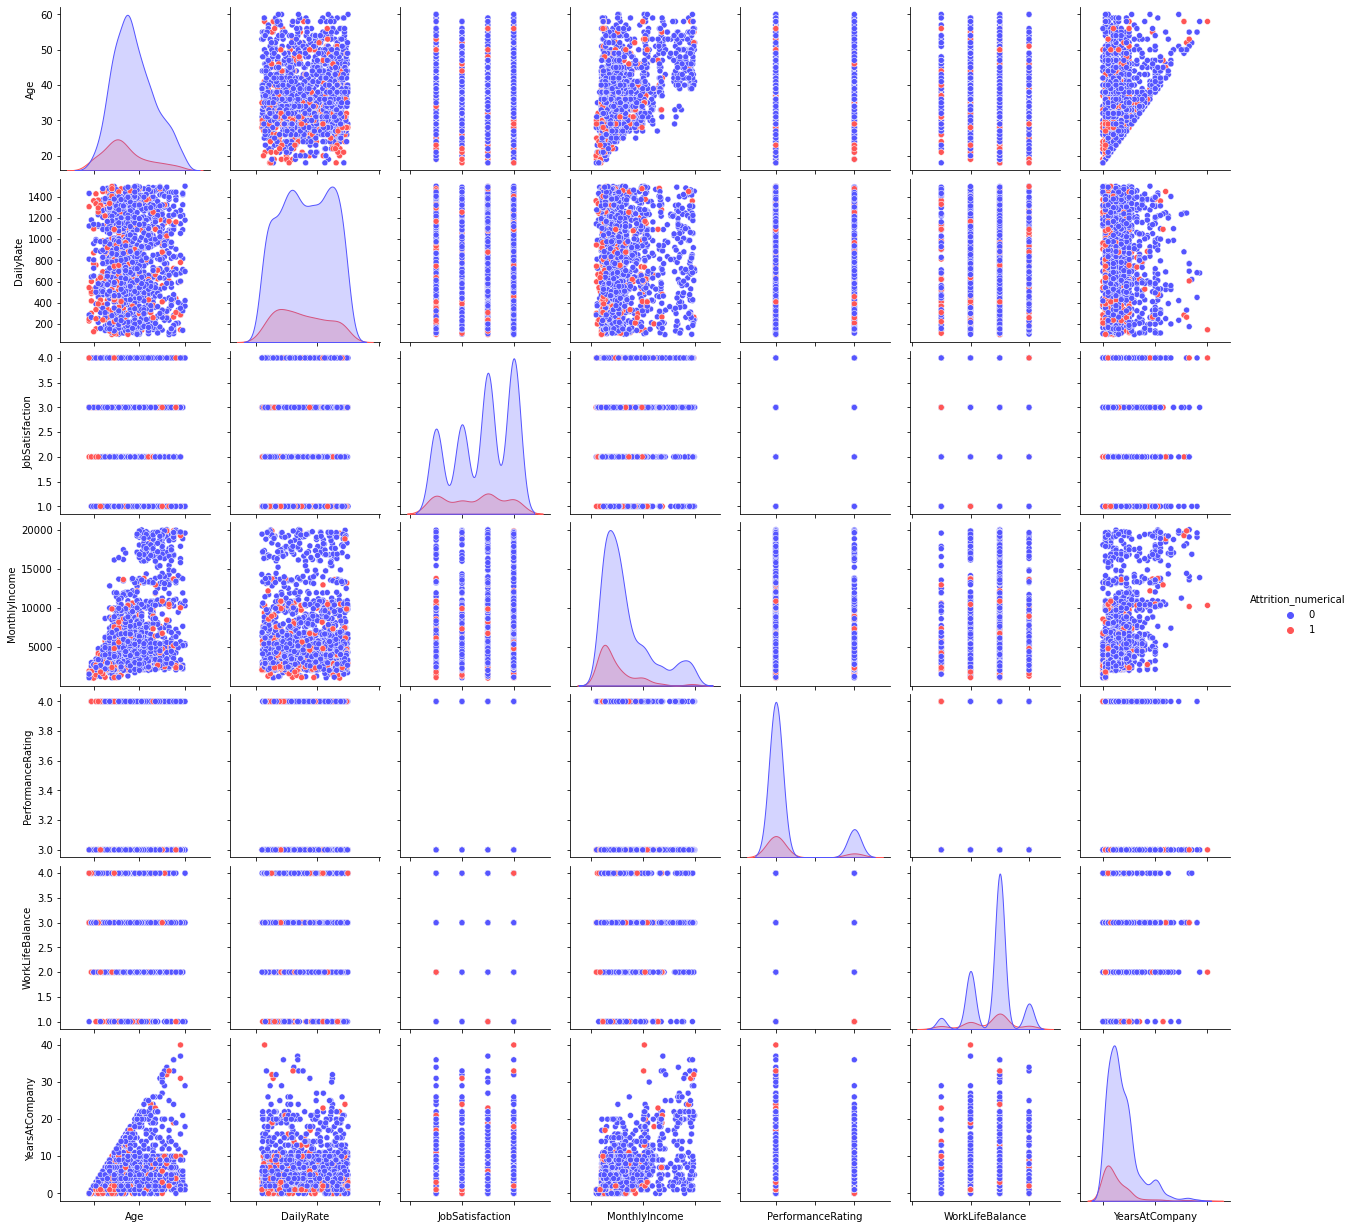

In [9]:
g = sns.pairplot(df[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

Dummifing Categorical Variables

In [10]:
dummydata = pd.get_dummies(df.drop(['Attrition','Attrition_numerical'], axis=1))

Construct Variables

In [11]:
X = dummydata
y = df['Attrition']

## KNN

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_std=pd.DataFrame(X_std, columns=X.columns)

Split data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 0)

Finding the optimal K

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neighbors = []
cv_scores = []
for i in range (1,40,2):
    neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights="distance")
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [16]:
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print('The optimal number of neighbors is % d ' % optimal_k)

The optimal number of neighbors is  11 


KNN with the optimal K 

In [17]:
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=optimal_k,p=2, weights="distance")
model = knn.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

In [18]:
accuracy_knn = accuracy_score(y_test, y_test_pred)
print("Classification Report: \n {}\n".format(classification_report(y_test, y_test_pred)))

Classification Report: 
               precision    recall  f1-score   support

          No       0.86      1.00      0.92       371
         Yes       0.89      0.11      0.20        70

    accuracy                           0.86       441
   macro avg       0.87      0.56      0.56       441
weighted avg       0.86      0.86      0.81       441




## Random Forest

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0, n_estimators=100)
model_rf = randomforest.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)


In [21]:
accuracy_rf = accuracy_score(y_test, y_test_pred)
accuracy_rf

0.8616780045351474

In [22]:
print("Classification Report: \n {}\n".format(classification_report(y_test, y_test_pred)))

Classification Report: 
               precision    recall  f1-score   support

          No       0.87      0.99      0.92       371
         Yes       0.76      0.19      0.30        70

    accuracy                           0.86       441
   macro avg       0.82      0.59      0.61       441
weighted avg       0.85      0.86      0.82       441




Feature Importance

<AxesSubplot:>

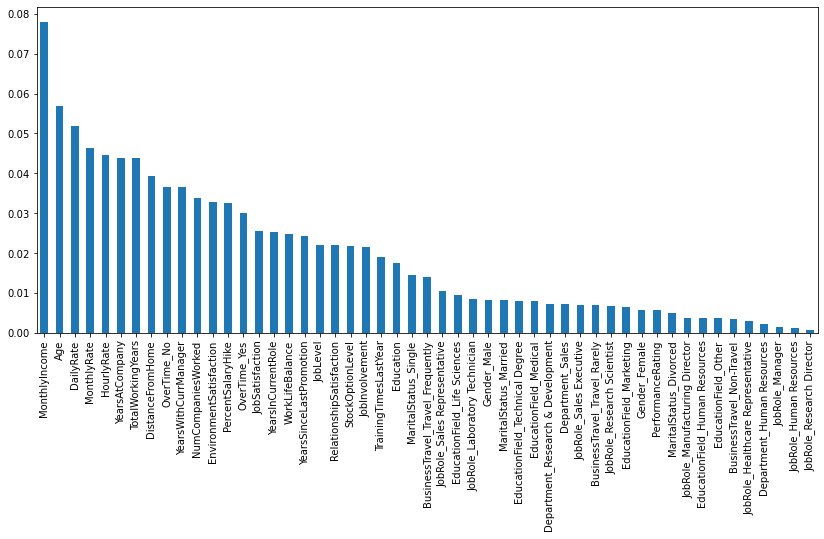

In [23]:
pd.Series(model_rf.feature_importances_,index = dummydata.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))
